In [2]:
%load_ext autoreload
%autoreload 2
from lab.postprocessing.toolbox import load_model, load_and_evaluate_dir, evaluate
from lab.postprocessing.visualization import get_grid_points, make_violin_plot
from lab.data.datasets import SyntheticDatasetHard
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import torch
import os
import numpy as np

In [3]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'

In [4]:
model_dir = 'synth10d10c/mlp/_model_layer_dims_(10, 10)'
acc_mlp3 = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  55.47 +-  0.96
cross entropy:  1.274 +-  0.012
number parameters: 330


In [5]:
model_dir = 'synth10d10c/mlp/_model_layer_dims_(10, 10, 10)'
acc_mlp4 = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  58.39 +-  0.70
cross entropy:  1.206 +-  0.017
number parameters: 440


In [18]:
model_dir = 'synth10d10c/myrnn/_trainer_max_rec_scheduler.step_length_1'
acc_rnn1 = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  55.12 +-  1.07
cross entropy:  1.287 +-  0.021
average steps:  1.084 +-  0.004
number parameters: 376


In [18]:
model_dir = 'synth10d10c/myrnn/_trainer_max_rec_scheduler.step_length_1'
acc_rnn1 = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  55.12 +-  1.07
cross entropy:  1.287 +-  0.021
average steps:  1.084 +-  0.004
number parameters: 376


In [19]:
model_dir = 'synth10d10c/myrnn/_model_threshold_0.4_model_fixed_input_False_model_rnn_type_myrnn'
#acc_rnn1 = load_and_evaluate_dir(result_dir, model_dir)

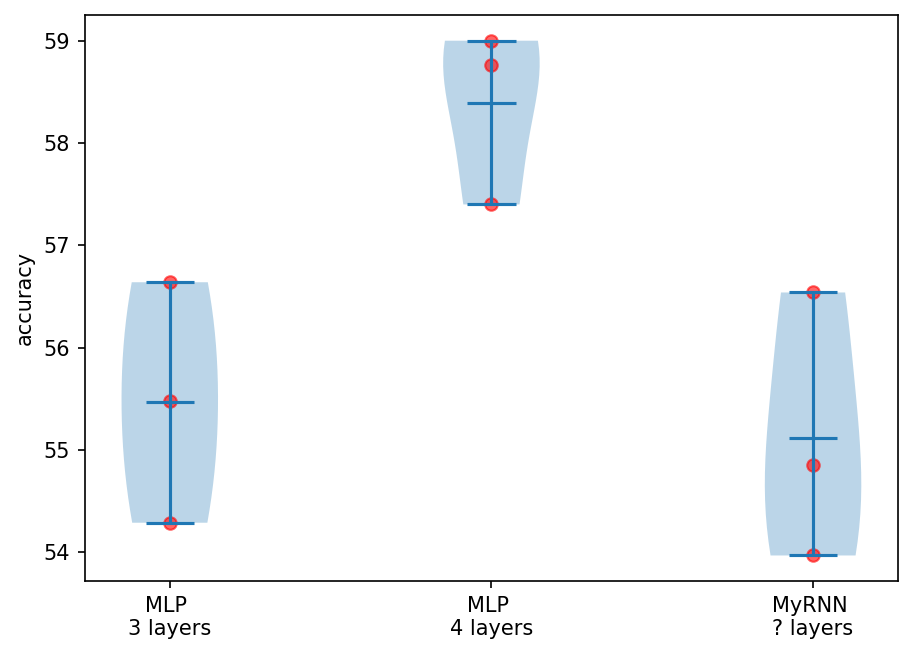

In [20]:
plt.figure(figsize=(7, 5), dpi=150)

make_violin_plot([acc_mlp3, acc_mlp4, acc_rnn1])


plt.xticks(range(3), ['MLP \n3 layers', 'MLP \n4 layers', 'MyRNN \n? layers'])
plt.ylabel('accuracy')
plt.savefig(os.path.join(result_dir, 'images/spiral_violin'))

In [ ]:
import scipy
scipy.stats.ttest_ind(acc_mlp3, acc_rnn1, equal_var=False)